<a href="https://colab.research.google.com/github/gabrielpraado/Data_Science/blob/main/Analisando_os_dados_do_Airbnb_(Barcelona).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Projeto prático tendo como modelo o projeto 1 do curso *Data Science na prática*, criado por Calos Melo, autor do blog [sigmoidal.ai](https://sigmoidal.ai)**

# Análise de Dados do Airbnb - Barcelona

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Aribnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listing.csv` - *Summary information and metrics for listings in Barcelona (good for visualisations).*

Uma vez que tenha feito o download da base de dados, faça upload dela para o seu drive pessoal para realizar as análises

In [1]:
# Autorizando o colab a importar arquivos do drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/drive/My Drive/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,116,1,21,2019-11-01,0.22,19,80
1,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.04,3,69
2,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,200,3,52,2019-12-15,0.43,2,326
3,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,79,2,63,2020-02-22,0.54,5,0
4,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,40,30,8,2013-07-15,0.06,3,40


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão 'resumida' do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1])) 

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 18471
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


In [6]:
# mostrar o percentual de valores ausentes e ordenar em ordem descrecente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.314710
last_review                       0.314710
host_name                         0.000812
name                              0.000596
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

É possível perceber que:

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 31,4% das linhas.
* Todas as demais variáveis possuem menos de 1% de valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

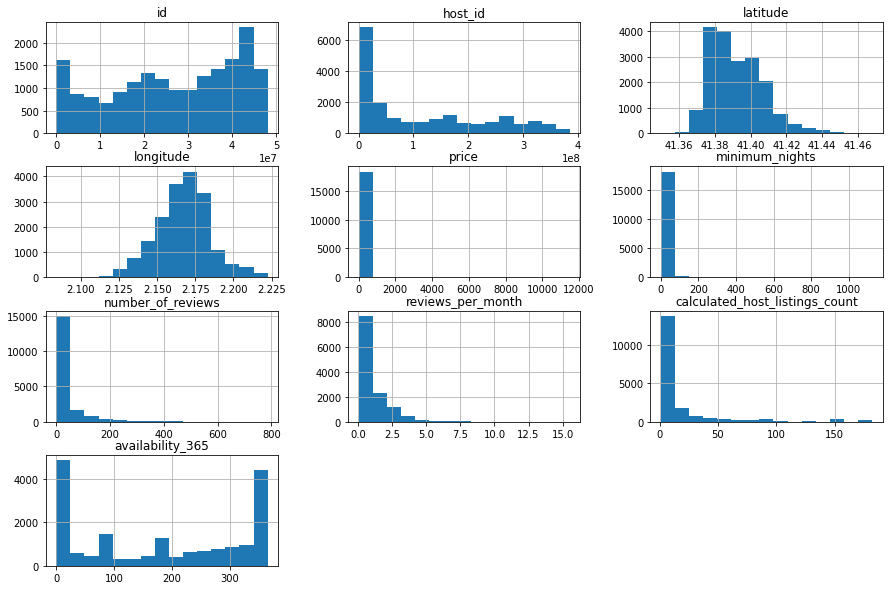

In [7]:
# plotar o histograma das variáveis numéricas
# o ";" no final serve para ocultar os códigos de array
df.hist(bins=15, figsize=(15,10));

## **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`e `calculated_host_listings_counts`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18471.000000,18471.000000,18471.000000,12658.000000,18471.000000,18471.000000
mean,103.764387,12.677928,31.477126,0.959445,15.917005,181.417682
std,420.594777,31.568122,63.361187,1.126890,32.341324,143.788502
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,34.000000,1.000000,0.000000,0.150000,1.000000,9.000000
50%,54.000000,3.000000,3.000000,0.510000,3.000000,180.000000
75%,95.000000,30.000000,32.000000,1.430000,14.000000,333.000000
max,11500.000000,1124.000000,786.000000,15.540000,182.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 95, porém seu valor máximo é 11500.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

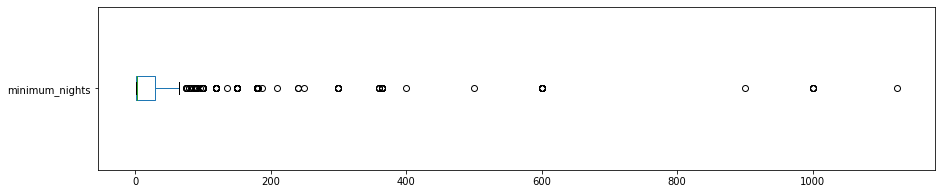

minimum_nights: valores acima de 30:
3690 entradas
19.9773%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

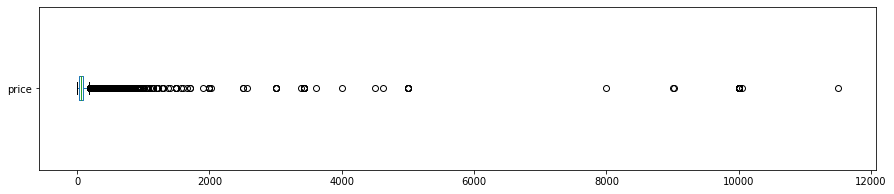


price: valores acima de 1500
62 entradas
0.3357%


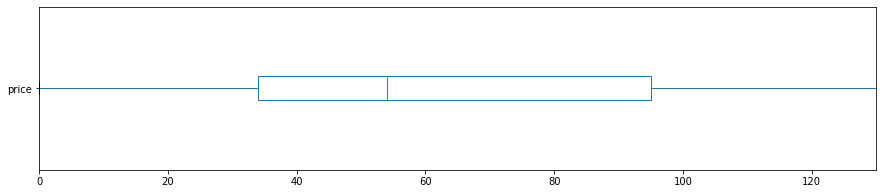

In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print ("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

df.price.plot(kind='box', vert=False, xlim=(0,130), figsize=(15,3));

#### Histograma sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

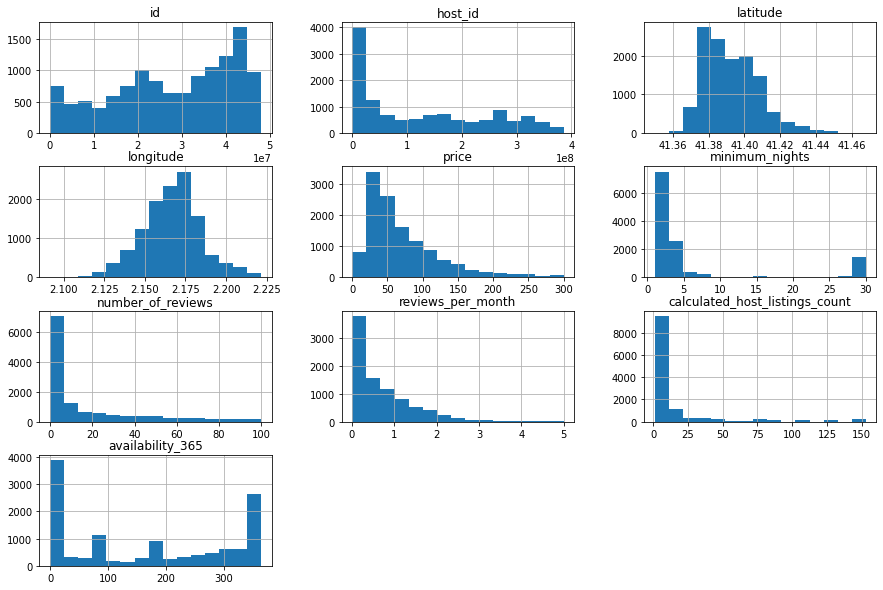

In [11]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 100].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 5].index, axis = 0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa qu existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.113725,0.082732,0.005057,0.297421,0.109745
minimum_nights,-0.113725,1.000000,-0.184839,-0.151148,0.004950,0.108394
number_of_reviews,0.082732,-0.184839,1.000000,0.738575,0.001351,0.030488
reviews_per_month,0.005057,-0.151148,0.738575,1.000000,0.002570,0.056876
calculated_host_listings_count,0.297421,0.004950,0.001351,0.002570,1.000000,0.111232
availability_365,0.109745,0.108394,0.030488,0.056876,0.111232,1.000000


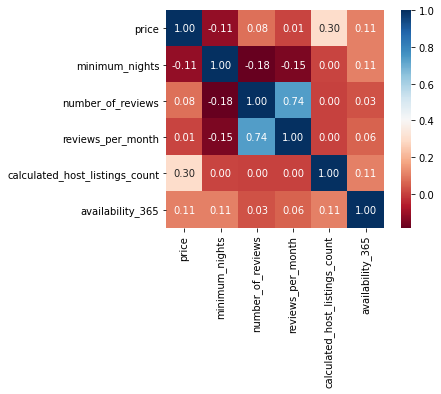

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor = 'white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casa inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       7317
Entire home/apt    4690
Hotel room          213
Shared room         196
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.589320
Entire home/apt    0.377738
Hotel room         0.017155
Shared room        0.015786
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Barcelona?**

Uma maneira de se verificar uma variável em função da outra é usando o `groundby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [16]:
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Marina del Prat Vermell                      114.750000
Vallvidrera, el Tibidabo i les Planes           114.428571
la Vila Olímpica del Poblenou                   112.929134
Diagonal Mar i el Front Marítim del Poblenou    104.187500
la Dreta de l'Eixample                           98.919444
les Tres Torres                                  87.000000
Pedralbes                                        83.157895
l'Antiga Esquerra de l'Eixample                  81.640060
la Sagrada Família                               80.911047
el Putxet i el Farró                             78.414894
Name: price, dtype: float64

Acima, vemos que os bairros como la Marina del Prat Vermell e Vallvidrera, el Tibidabo i les Planes estão como as maiores médias de preço. Para evitar conclusões erradas a respeito dos dados, é sempre aconselhavel fazer uma análise de quantos imóveis existem nesses locais, para garantia  que a amostra é realmente representativa.


In [17]:
# ver a quantidade de imóveis na la Marina del Prat Vermell
print(df_clean[df_clean.neighbourhood == 'la Marina del Prat Vermell'].shape)

df_clean[df_clean.neighbourhood == "la Marina del Prat Vermell"]

(8, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
890,1410802,White House,10911051,Pool Houses Barcelona,Sants-Montjuïc,la Marina del Prat Vermell,41.35301,2.14827,Entire home/apt,190,3,53,2020-06-01,0.58,7,301
1098,1839281,Lilac House,10911051,Pool Houses Barcelona,Sants-Montjuïc,la Marina del Prat Vermell,41.35265,2.14775,Entire home/apt,250,3,62,2021-01-03,0.89,7,318
2010,4542502,Pink House. House with a pool.,10911051,Pool Houses Barcelona,Sants-Montjuïc,la Marina del Prat Vermell,41.35261,2.14768,Entire home/apt,300,3,93,2020-12-22,1.29,7,272
5336,17533086,комната в центре,118916464,Diana,Sants-Montjuïc,la Marina del Prat Vermell,41.37168,2.17606,Private room,50,6,0,NaN,NaN,1,0
6247,19748665,Ático Luminoso planta 9 con terraza grande,95098626,Dani,Sants-Montjuïc,la Marina del Prat Vermell,41.35483,2.14171,Shared room,30,1,0,NaN,NaN,1,0
10267,31612559,Bonita casa en plena cuidad con acceso a toda bcn,222165449,Karen,Sants-Montjuïc,la Marina del Prat Vermell,41.35186,2.13980,Private room,20,30,1,2019-07-19,0.05,1,364
12859,37941866,Nearly placa españa (amir apartment),287502194,Neicily,Sants-Montjuïc,la Marina del Prat Vermell,41.34978,2.14710,Private room,45,1,9,2020-01-01,0.55,2,89
12888,38023699,Nearly placa españa (maryam apartment),287502194,Neicily,Sants-Montjuïc,la Marina del Prat Vermell,41.35057,2.14584,Private room,33,1,7,2020-01-02,0.44,2,89


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

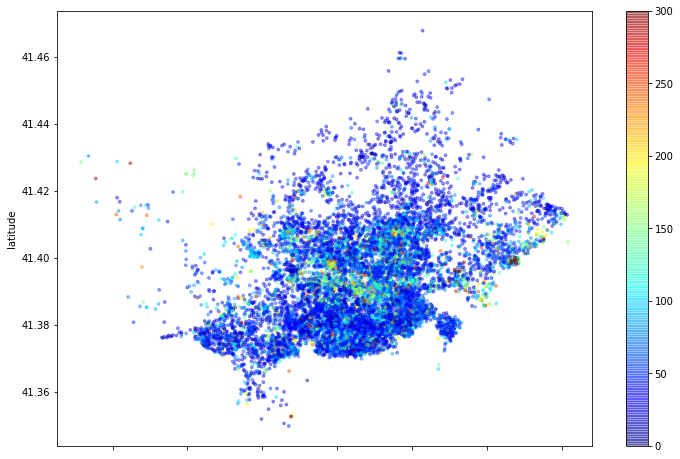

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.